In [2]:
import os
import numpy as np

from astropy.io import fits
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import lightkurve as lk
from astroquery.simbad import Simbad
import pandas as pd 
from numpy import genfromtxt
from sklearn.preprocessing import normalize

from labellines import labelLine, labelLines


# #tf
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

devices = tf.config.list_physical_devices()
print(devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
pd.read_csv('/Users/michaelsong/Documents/GitHub/starzam/Data_Unk/0.csv',delimiter=',').to_numpy().shape

(166, 238)

In [6]:
all_data = np.empty((1,237))
for dataset in ['Data_Unk']:
  new_data = np.empty((1,238))
  for i in range(1610*2):
    try:
      new_data = np.concatenate((new_data,pd.read_csv('/Users/michaelsong/Documents/GitHub/starzam/'+dataset+'/'+str(i)+'.csv',delimiter=',').to_numpy()), axis=0)
    except:
      continue
    print("\r"+str(i),end="")
  new_data = new_data[1:].T[1:].T
  print(new_data.shape)
  all_data = np.concatenate((all_data,new_data),axis=0)
all_data = all_data[1:]
print(all_data.shape)

1469(166501, 237)
(166501, 237)


In [8]:
print(all_data)
print(all_data.T[0])

[[1.02770700e+06 0.00000000e+00 1.39890418e+01 ... 1.40088815e+00
  4.99757196e+00 2.53925054e+00]
 [1.02770700e+06 1.00000000e+00 1.07633342e+01 ... 1.12287184e+00
  8.02622065e-01 1.64229008e+00]
 [1.02770700e+06 2.00000000e+00 6.28841833e-01 ... 5.12228022e-01
  9.06318418e-01 9.60752623e-01]
 ...
 [1.29842270e+07 1.50000000e+01 5.84640454e+01 ... 8.83158468e+00
  4.02862301e+00 6.16822902e+00]
 [1.29842270e+07 1.60000000e+01 2.81289920e+01 ... 1.23020406e+01
  1.24255540e+01 1.04436478e+01]
 [1.29842270e+07 1.70000000e+01 8.64481327e+01 ... 1.11400497e+01
  2.61992823e+00 1.00223404e+01]]
[ 1027707.  1027707.  1027707. ... 12984227. 12984227. 12984227.]


In [11]:
def extract_xy(all_data):
    all_x = all_data.T[1:].T
    return all_x

all_x= extract_xy(all_data)
print(all_x.shape)
print(all_x)

(166501, 236)
[[ 0.         13.98904182 22.74369107 ...  1.40088815  4.99757196
   2.53925054]
 [ 1.         10.76333416  7.32309331 ...  1.12287184  0.80262206
   1.64229008]
 [ 2.          0.62884183  2.75527969 ...  0.51222802  0.90631842
   0.96075262]
 ...
 [15.         58.46404536 21.36573243 ...  8.83158468  4.02862301
   6.16822902]
 [16.         28.12899196 10.63946577 ... 12.30204061 12.42555401
  10.44364775]
 [17.         86.44813267 89.97446304 ... 11.14004967  2.61992823
  10.0223404 ]]


In [16]:
model = tf.keras.models.load_model('/Users/michaelsong/Documents/GitHub/starzam/Models/m6.0')

# Check its architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              242688    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 374,017
Trainable params: 374,017
Non-trainable params: 0
_________________________________________________________________


In [17]:
pred_all_y = model.predict(all_x).reshape(-1)

2022-02-10 12:33:59.506711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [18]:
print(pred_all_y.shape)
print(pred_all_y)

(166501,)
[2.9472022 1.6888727 2.4539585 ... 2.9113908 2.7384377 2.3243604]


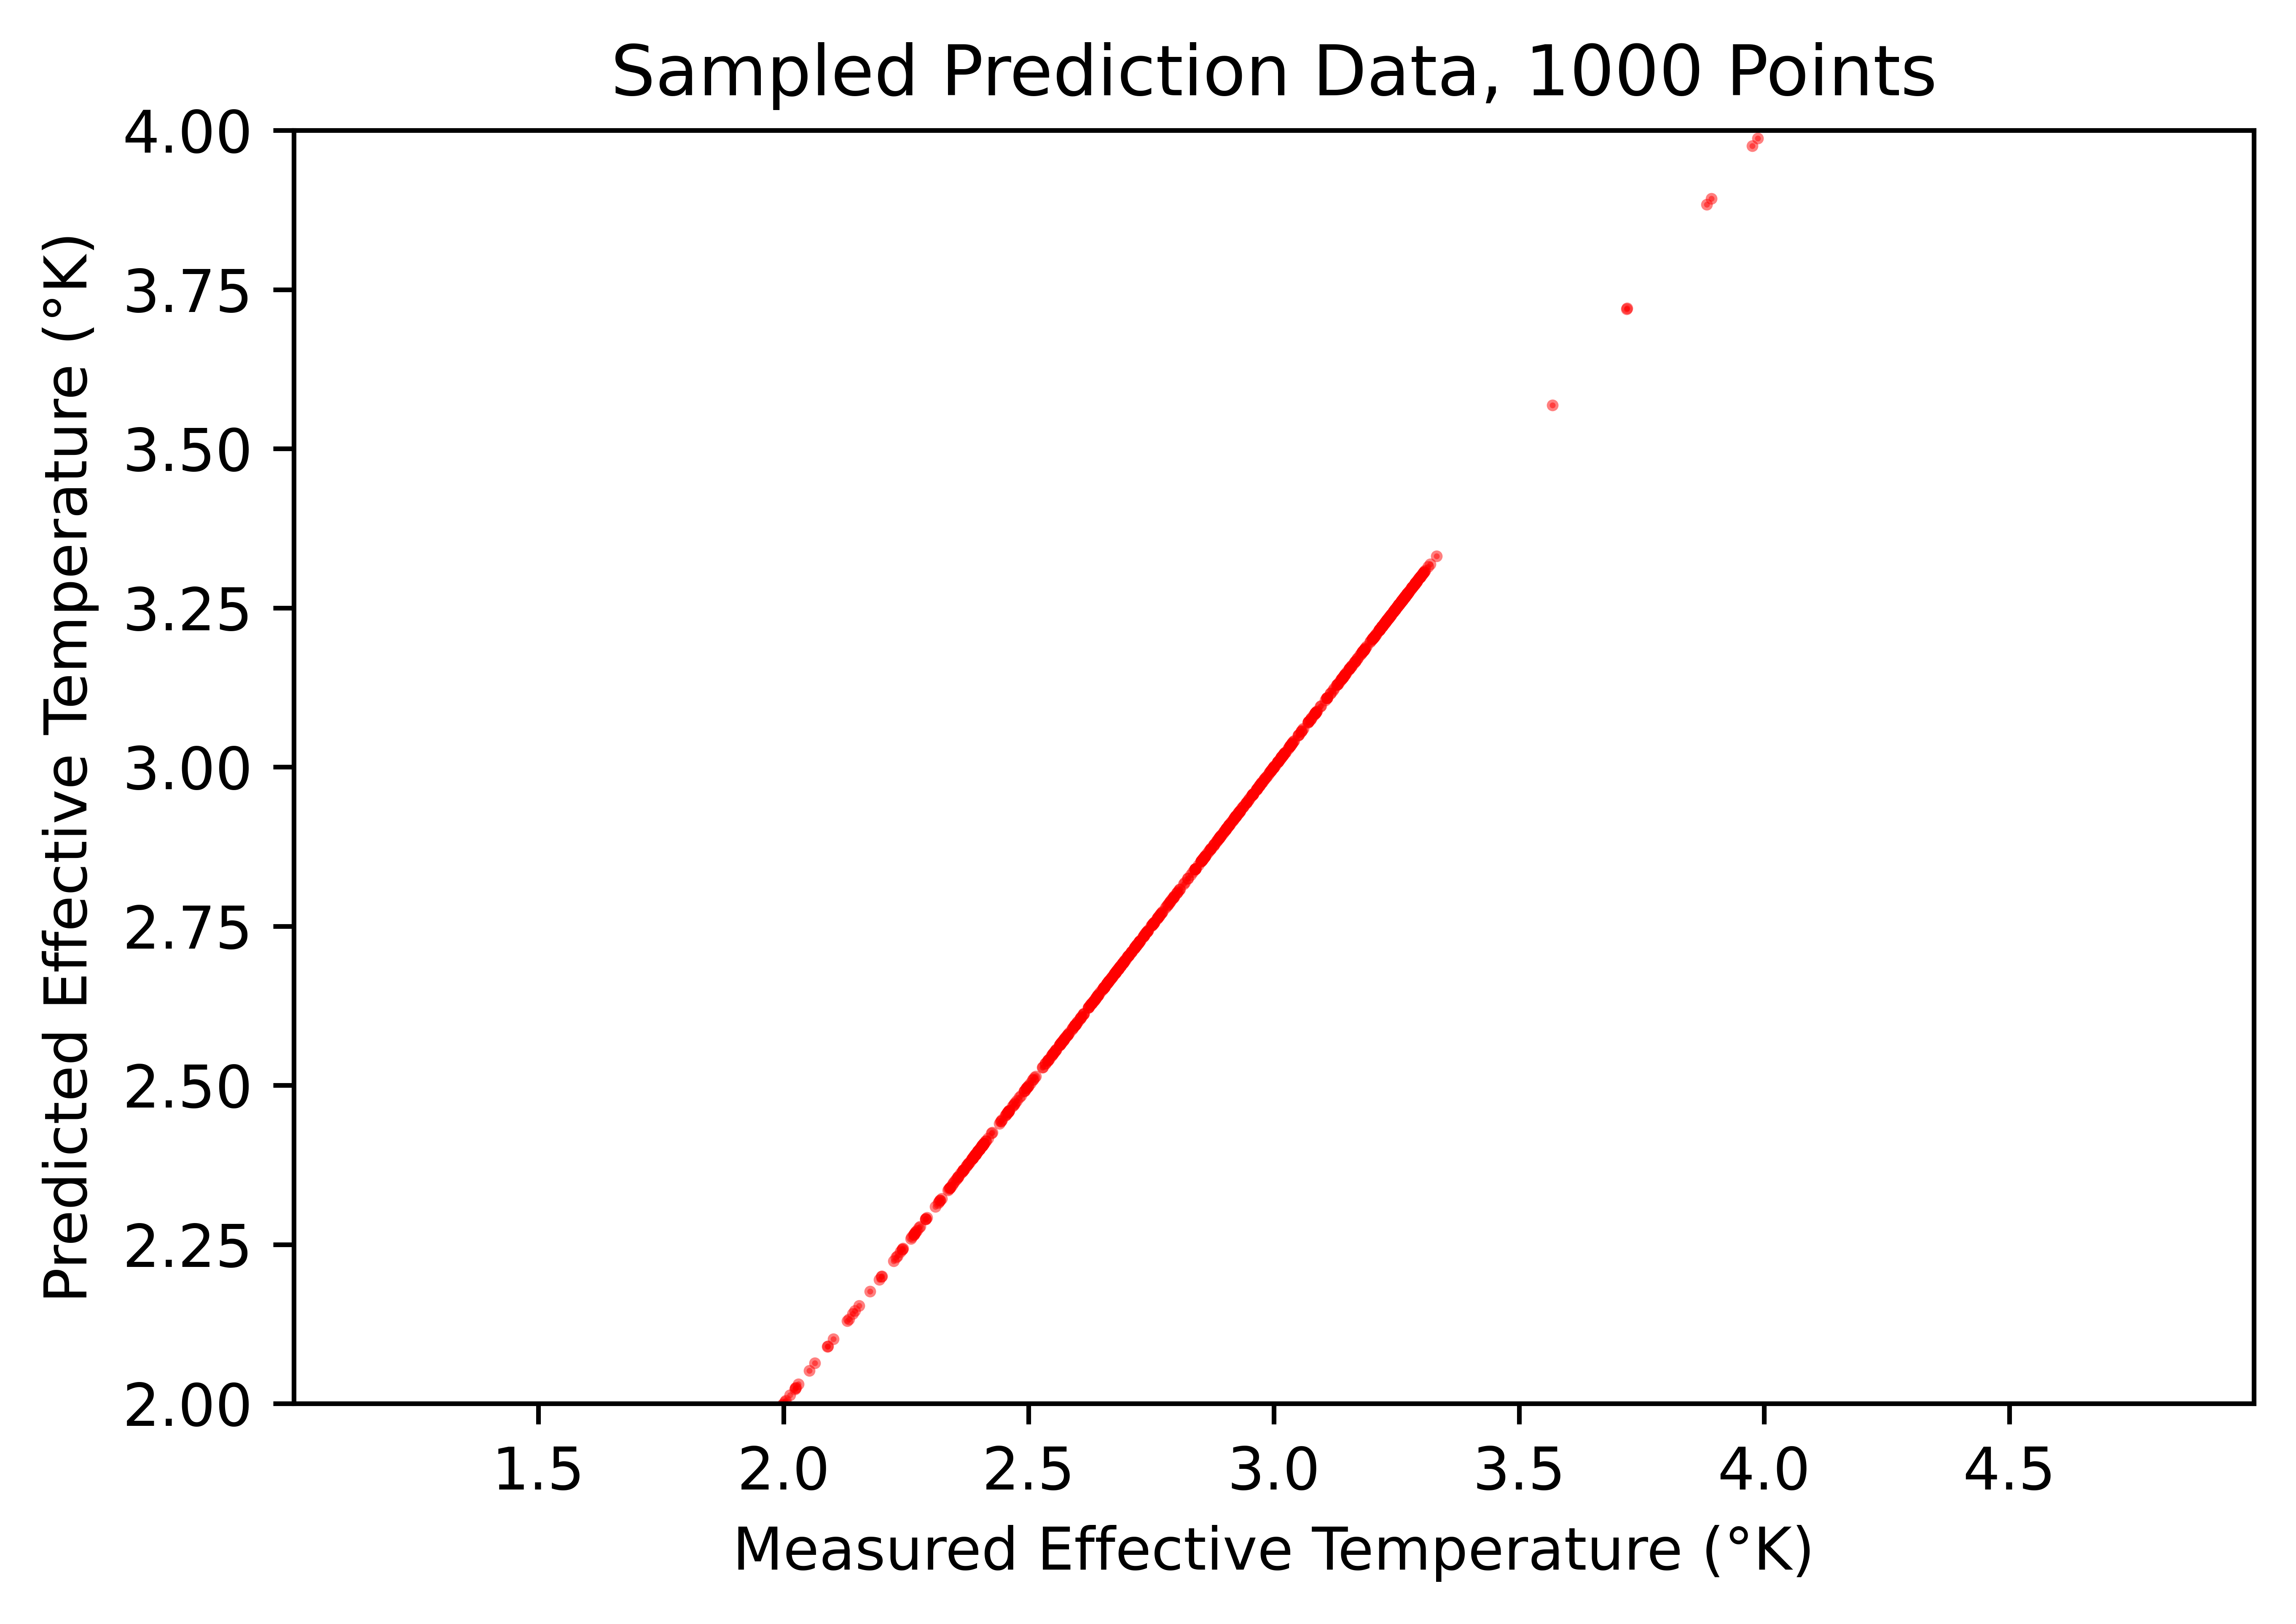

In [27]:
plt.rcParams['figure.dpi'] = 1000
# # plt.figure(figsize = (6.4,4.8))
plt.scatter(pred_all_y[:1000],pred_all_y[:1000], c='red', alpha=0.5,s=1)
# plt.scatter(test_y[:1000],pred_test_y[:1000], c='blue', alpha=0.5,s=0.5)
# plt.hist2d(train_y,pred_train_y,bins=[100,100],cmin=20)
# plt.hist2d(test_y,pred_test_y,bins=[100,100],cmin=20,cmap=plt.cm.BuPu)


# plt.scatter(rand_y,pred_rand_y, c='orange', alpha=0.5,s=0.1)

# bot = 4000
# top = 6000
bot = 2
top = 4

linex = np.linspace(bot-500, top+500)
liney = linex
lineytop = linex*1.06
lineybot = linex*0.94
lineytop2 = linex+200
lineybot2 = linex-200
# Create the plot
# plt.plot(linex, liney,c="green",label="±0")
# plt.plot(linex, lineytop,c="red",label="+6%")
# plt.plot(linex, lineybot,c="red",label="-6%")
# plt.plot(linex, lineytop2,c="orange",label="+200")
# plt.plot(linex, lineybot2,c="orange",label="-200")
plt.xlim(bot-0.999, top+0.999)
plt.ylim(bot, top)
plt.title('Sampled Prediction Data, 1000 Points')
plt.ylabel('Predicted Effective Temperature (°K)')
plt.xlabel('Measured Effective Temperature (°K)')
plt.savefig('/Users/michaelsong/Documents/GitHub/starzam/Results/pred2.png')
plt.show()


In [ ]:
for i in range(1,len(pred_all_y)):
    xset = []
    if (all_x[i]==all_x[i-1]):
        xset.append(pred_all_y[i])

In [45]:
all_data.T[0],pred_all_y.T
save_data = np.vstack((all_data.T[0],pred_all_y.T)).T
print(save_data)

[[1.02770700e+06 2.94720221e+00]
 [1.02770700e+06 1.68887269e+00]
 [1.02770700e+06 2.45395851e+00]
 ...
 [1.29842270e+07 2.91139078e+00]
 [1.29842270e+07 2.73843765e+00]
 [1.29842270e+07 2.32436037e+00]]


In [46]:
pd.DataFrame(save_data).to_csv("/Users/michaelsong/Documents/GitHub/starzam/Labels/pred_logg.csv")